<a href="https://colab.research.google.com/github/Granadog/Potencializando-o-desempenho-com-NoSQL/blob/main/MACHINE_LEARNING_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:


# Caminho do arquivo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Define o nome das colunas
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url, header=None, names=header)

In [15]:
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
# Mostra informações sobre o dataframe em si
df.info()


# class distribution
print(df.groupby('species').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


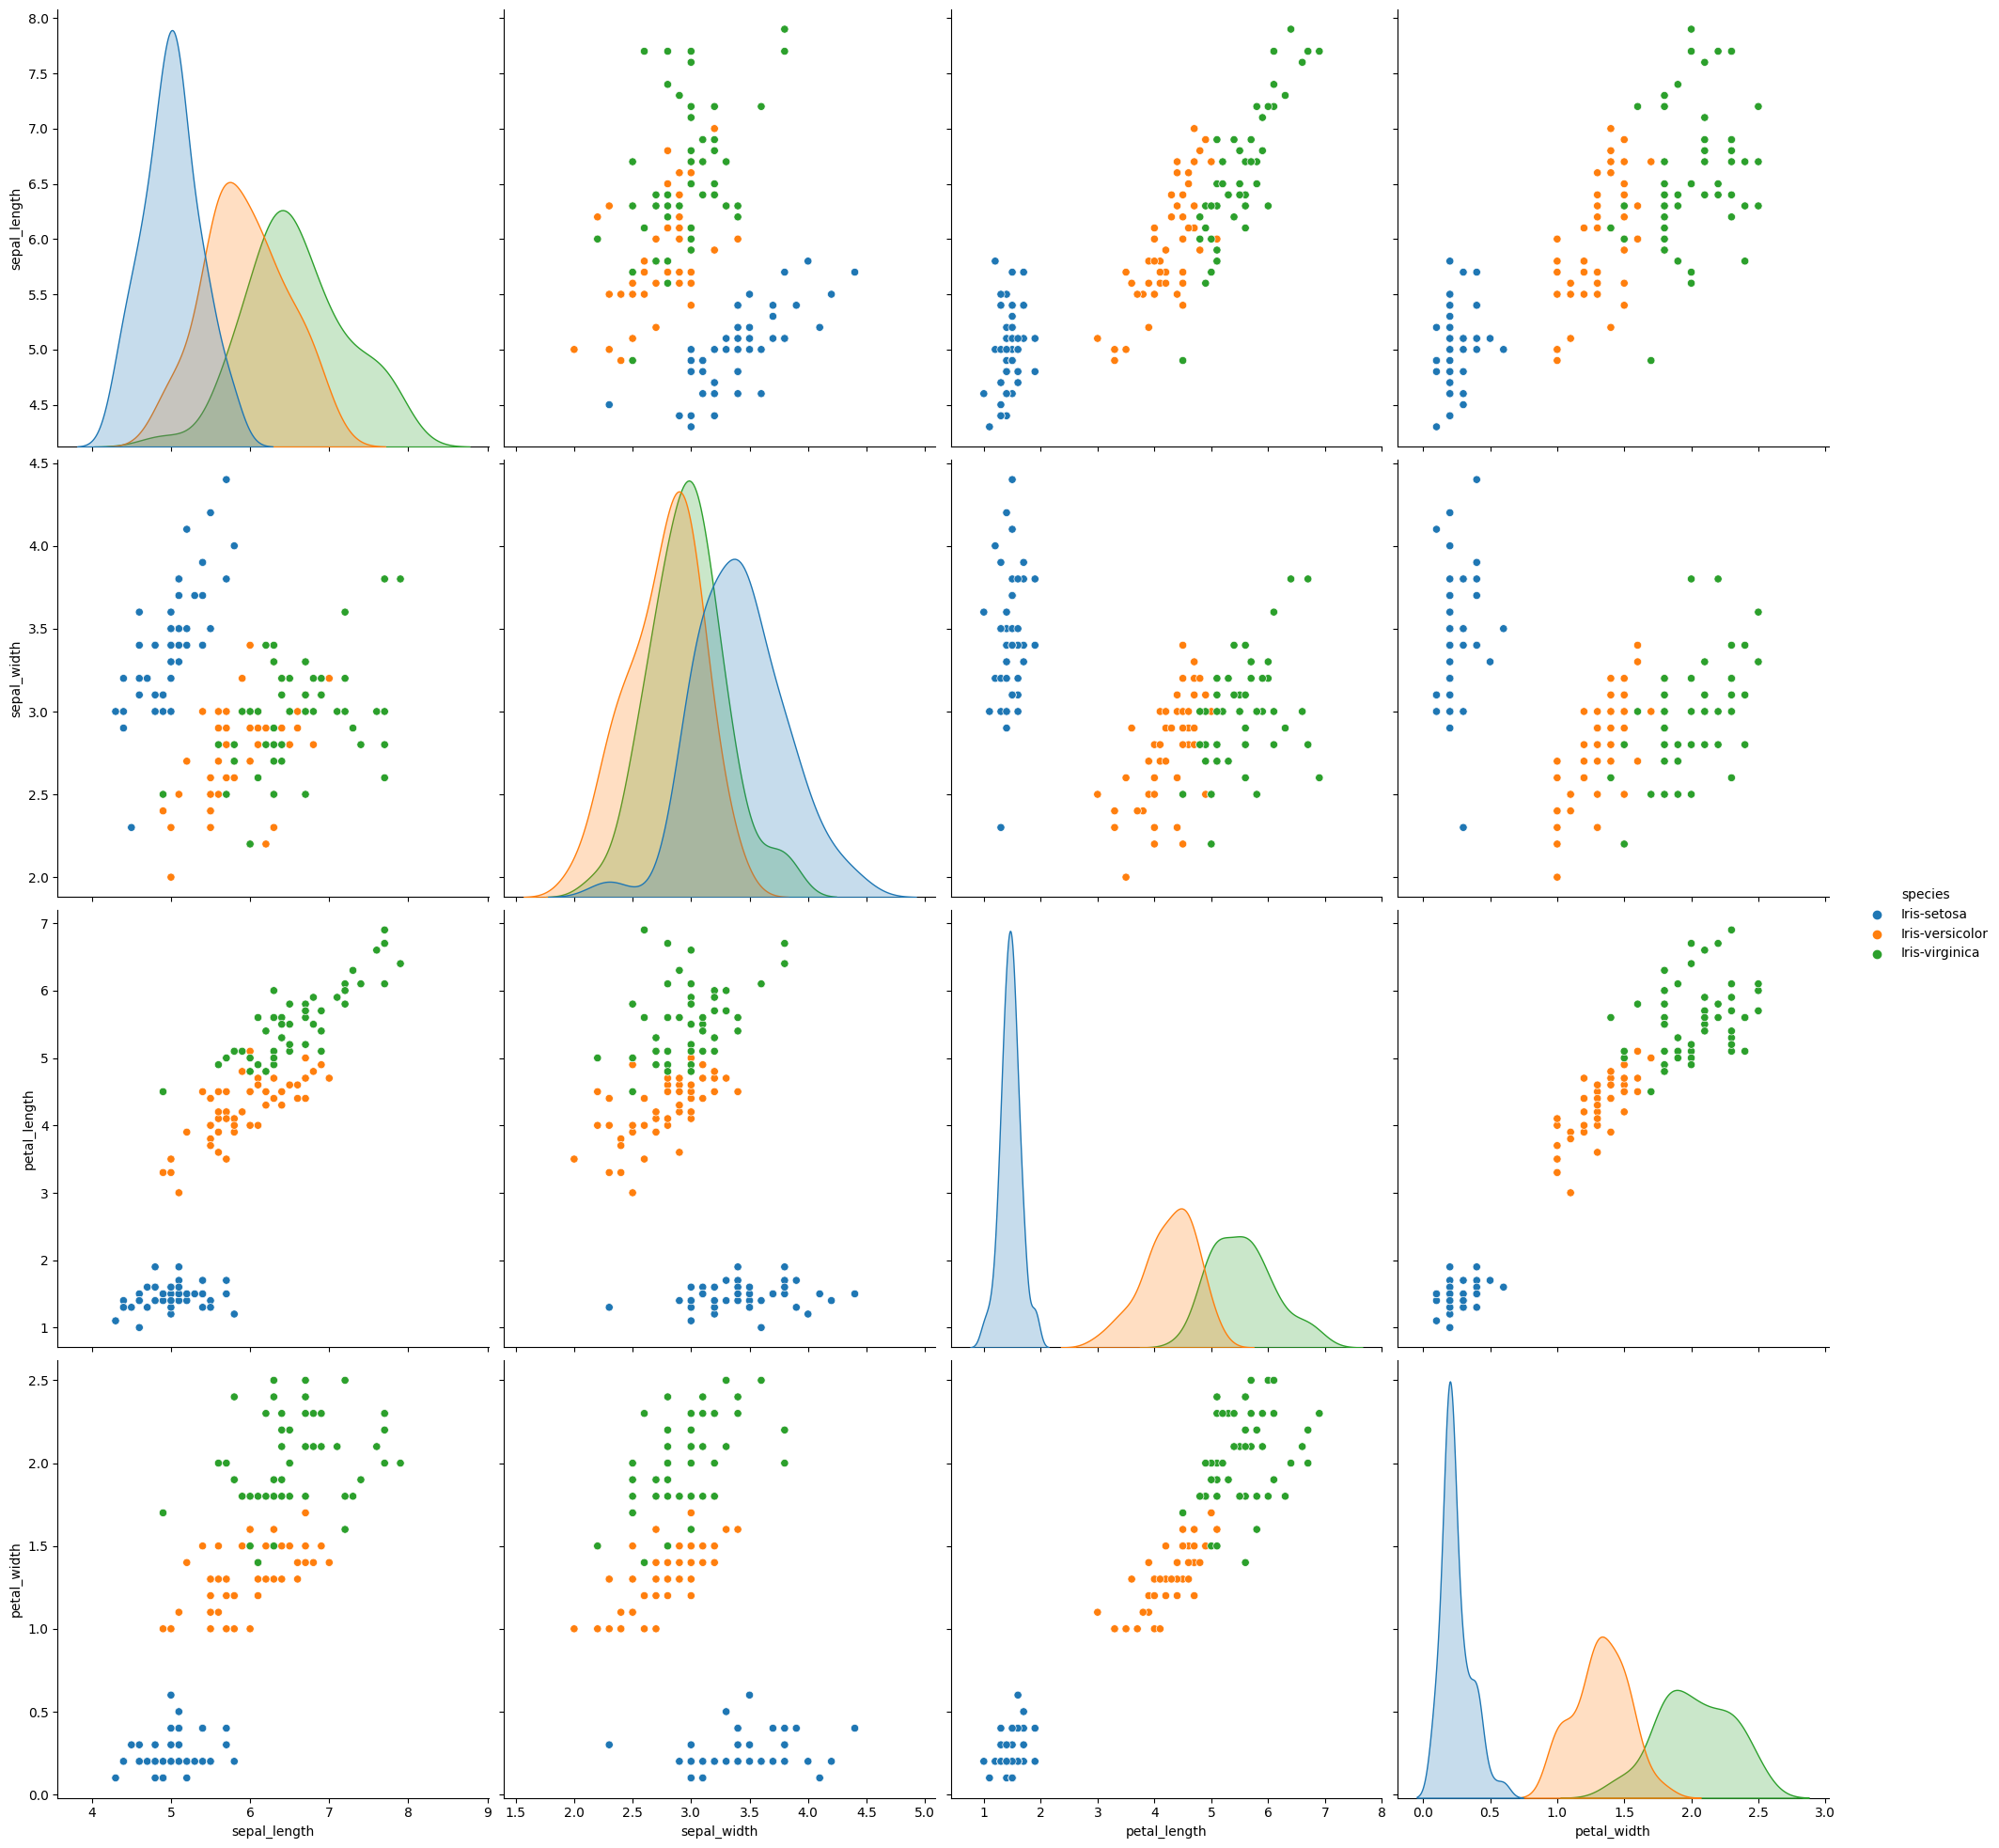

In [17]:
sns.pairplot(df, hue='species', height=5 )
plt.show()

In [18]:
# Selecionando um sub-dataframe
#com os campos petal_length e petal_width,
# e outro com a variável de classes
entradas = df[['petal_length', 'petal_width']]	# atributos
classes = df['species'] 					#target

# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (120, 2) e teste (30, 2)


In [22]:
entradas_treino.head()

,petal_length,petal_width
58,4.6,1.3
122,6.7,2.0
83,5.1,1.6
18,1.7,0.3
1,1.4,0.2


In [23]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 3
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Importa a biblioteca
from sklearn.tree import DecisionTreeClassifier 	# Arvore de decição
from sklearn.svm import SVC			# SVM (Suporte vector  Machine

# Cria o classificar arvore de decisão
modelo = DecisionTreeClassifier(max_depth=2, random_state=42)
modelo2 = SVC()

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)
modelo2.fit(entradas_treino, classes_treino)

SVC()

In [24]:
classes_encontradas = modelo.predict(entradas_teste.values)

print("Predição: {}".format(classes_encontradas))

Predição: ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
# Para determinar a quantidade de acertos (acuracia)

from sklearn.metrics import accuracy_score

acertos = accuracy_score(classes_teste, classes_encontradas)

print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  1.0
